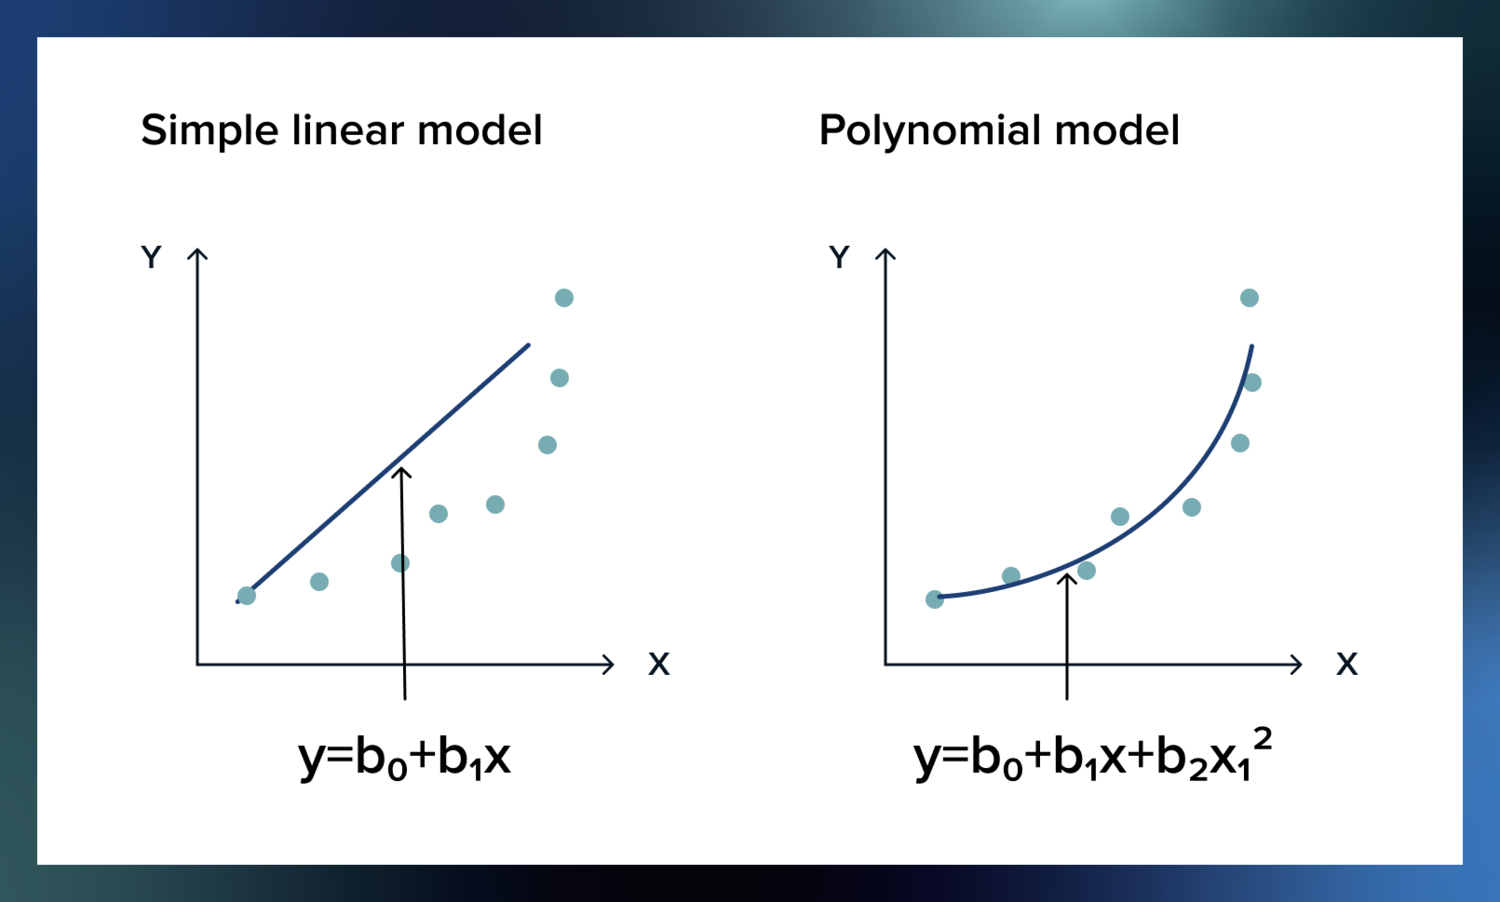

# Import basic libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv('../input/autompg-dataset/auto-mpg.csv')

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# Data Observation and Preprocessing

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
data.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
data['model year'] = pd.to_datetime(data['model year'],format='%y') #converting to time format

In [8]:
data.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
data['horsepower'].dtype

dtype('O')

**Here we see there is no null values but still our Horsepower have a alien value and 
because of it data type of that column is object let's observe it and fix it.**

In [10]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

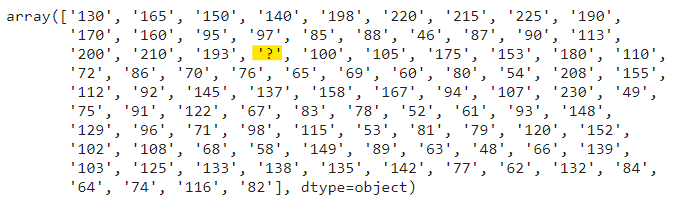


**As you observe carefully there is a alien value in above output**

In [11]:
data['horsepower'] = data['horsepower'].replace('?','102.894472') # replacing it with mean of horsepower column
data['horsepower'] = data['horsepower'].astype(float) # Converting object to float

# Data Visualization

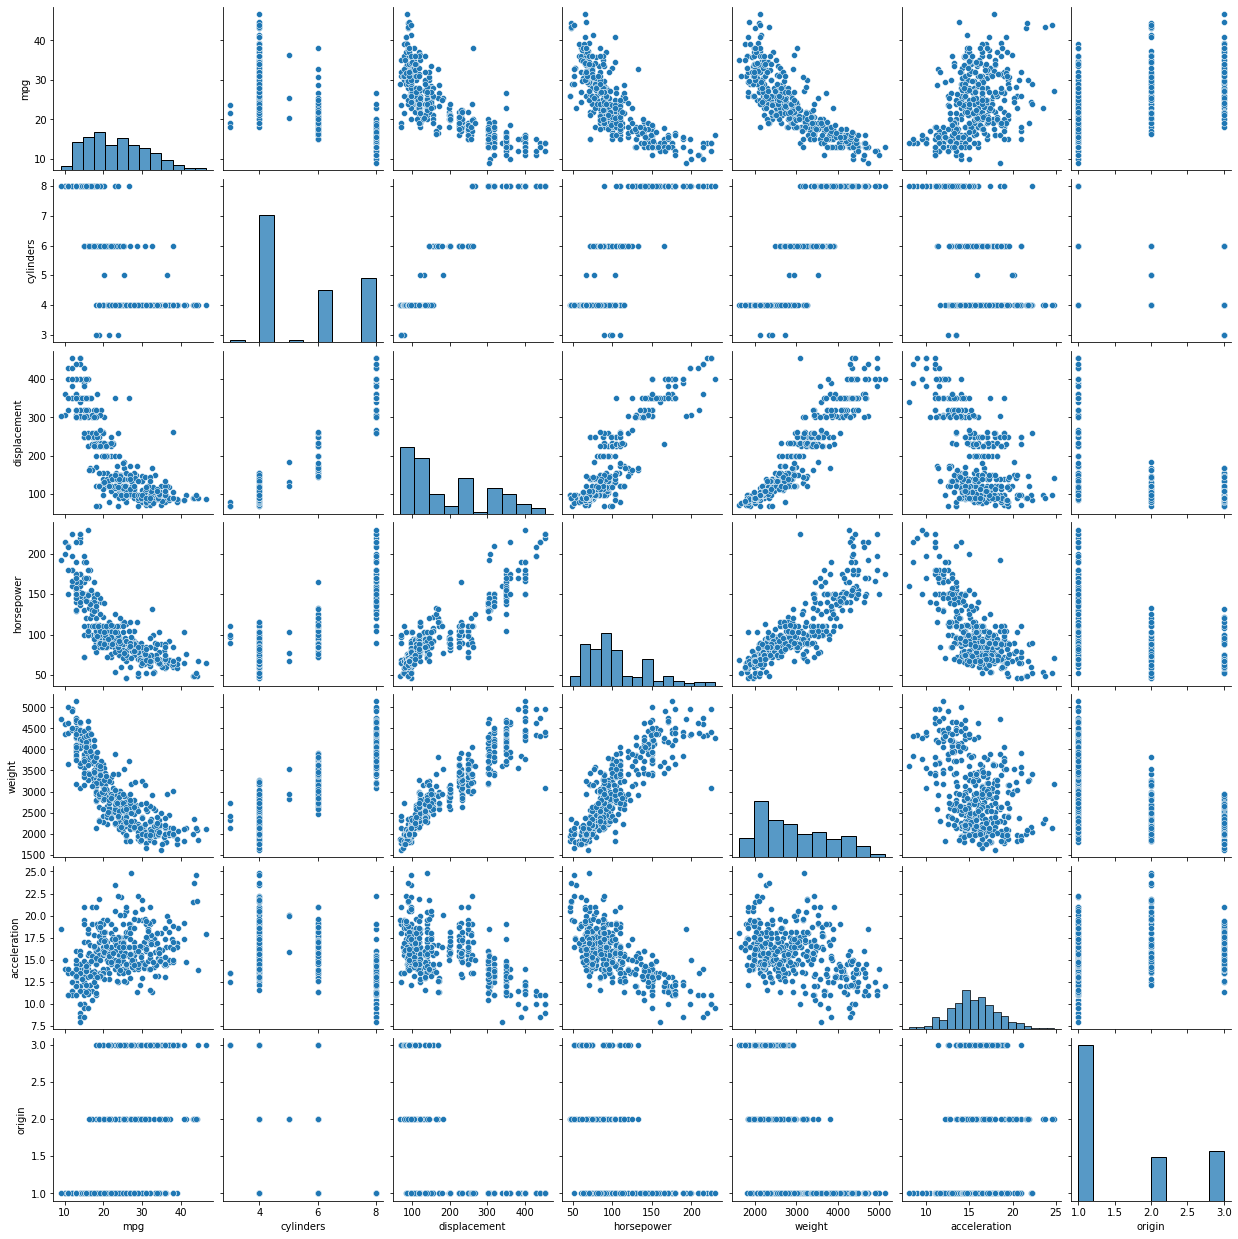

In [12]:
import seaborn as sns

sns.pairplot(data)

<AxesSubplot:>

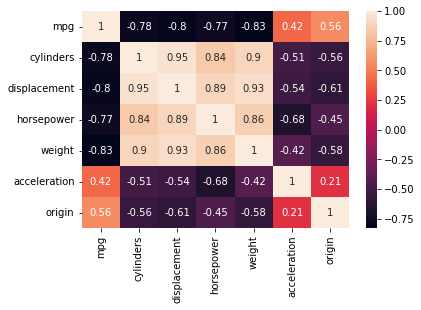

In [13]:
corr = data.corr() 
sns.heatmap(corr, annot = True)

# Data Split

In [14]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
X = data[['horsepower','weight']]
y = data['mpg']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)

In [17]:
#Shape of train test 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 2), (279, 2), (119,), (279,))

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF Features"] = X.columns
vif.round(1)

,VIF Factor,VIF Features
0,32.1,horsepower
1,32.1,weight


# Scalling 

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.intercept_

23.08823529411765

In [24]:
lr.coef_

array([-1.08761812, -5.57577975])

In [25]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [27]:
mean_absolute_percentage_error(y_test,y_pred)

0.141368028841587

In [28]:
r2_score(y_test,y_pred)

0.6812737229867057

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

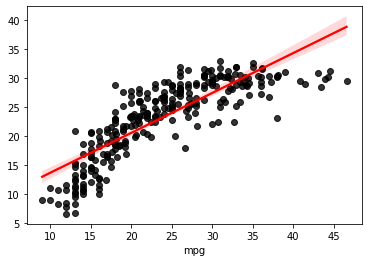

In [29]:
sns.regplot(y_test,y_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

**We can see by the above graph we will need polynomial regression for better results.**

# Statistical Data Exploration

In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.3
Date:                Thu, 11 Aug 2022   Prob (F-statistic):          4.36e-105
Time:                        08:00:33   Log-Likelihood:                -1140.5
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     395   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8368      0.790     58.037      0.0

# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [32]:
X_train2 = poly.fit_transform(X_train)

In [33]:
X_train2 = pd.DataFrame(X_train2, columns = ['bais','horsepower','weight','square of horsepower','horsepower*weight','square of weight'])

In [34]:
X_train2.head()

,bais,horsepower,weight,square of horsepower,horsepower*weight,square of weight
0,1.0,-1.008667,-1.222401,1.017410,1.232996,1.494264
1,1.0,1.273460,1.430142,1.621701,1.821230,2.045307
2,1.0,-1.092160,-1.308964,1.192813,1.429598,1.713387
3,1.0,1.078645,1.149430,1.163474,1.239827,1.321190
4,1.0,0.271551,-0.196009,0.073740,-0.053226,0.038420


In [35]:
X_test2 = poly.fit_transform(X_test)

In [36]:
X_test2 = pd.DataFrame(X_test2, columns = ['bais','horsepower','weight','square of horsepower','horsepower*weight','square of weight'])

In [37]:
lr.fit(X_train2,y_train)

LinearRegression()

In [38]:
lr.intercept_

21.1198554419667

In [39]:
lr.coef_

array([ 0.        , -2.74604479, -5.02132123,  0.71787156, -0.21313931,
        1.42867662])

In [40]:
pred2 = lr.predict(X_test2)

In [41]:
mean_absolute_percentage_error(y_test,pred2)

0.12134434942371582

In [42]:
r2_score(y_test,pred2)

0.7171745031449067

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

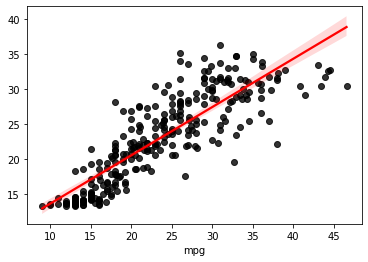

In [43]:
sns.regplot(y_test,pred2,scatter_kws={"color": "black"}, line_kws={"color": "red"})

**This is better fit and Accuracy than Linear Regression**